In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

from nba_api.stats.static import teams

In [3]:
# set city to search
city = 'oklahoma'
#city = 'houston'

# set output files
dir_name ="DATA/"
base_filename = city
filename_suffix =".csv"
season_out = os.path.join(dir_name, base_filename + "_2018-2019_league_Data" + filename_suffix)

output_file = os.path.join("Plot/", base_filename + "_WL.png")
output_file2 = os.path.join("Plot/", base_filename + "_pts_plusMinus.png")

In [4]:
# Find teams by city.
team_info = teams.find_teams_by_city(city)
full_name = team_info[0]["full_name"]
full_name

'Oklahoma City Thunder'

In [5]:
city_df = pd.read_csv(season_out)
city_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,1610612760,OKC,Oklahoma City Thunder,21801226,2019-04-10,OKC @ MIL,W,240,127,...,0.615,9,44,53,40,7,3,12,20,11.0
1,22018,1610612760,OKC,Oklahoma City Thunder,21801218,2019-04-09,OKC vs. HOU,W,240,112,...,0.800,18,38,56,20,5,2,12,19,1.0
2,22018,1610612760,OKC,Oklahoma City Thunder,21801197,2019-04-07,OKC @ MIN,W,239,132,...,0.846,14,32,46,27,6,4,13,30,6.0
3,22018,1610612760,OKC,Oklahoma City Thunder,21801186,2019-04-05,OKC vs. DET,W,240,123,...,0.682,21,38,59,30,10,4,17,24,13.0
4,22018,1610612760,OKC,Oklahoma City Thunder,21801161,2019-04-02,OKC vs. LAL,W,241,119,...,0.600,17,33,50,33,15,7,12,14,16.0


In [6]:
Total_games = len(city_df) # total games played in official season
Total_games

82

In [7]:
city_extract_df = city_df[["GAME_ID","MATCHUP","GAME_DATE","WL","PTS","PLUS_MINUS"]]
city_extract_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801226,OKC @ MIL,2019-04-10,W,127,11.0
1,21801218,OKC vs. HOU,2019-04-09,W,112,1.0
2,21801197,OKC @ MIN,2019-04-07,W,132,6.0
3,21801186,OKC vs. DET,2019-04-05,W,123,13.0
4,21801161,OKC vs. LAL,2019-04-02,W,119,16.0


In [8]:
WL_df = city_extract_df.groupby("WL").count()["GAME_ID"]
WL_df

WL
L    33
W    49
Name: GAME_ID, dtype: int64

In [9]:
Home_df = city_extract_df[city_extract_df['MATCHUP'].str.contains("@")]
Home_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801226,OKC @ MIL,2019-04-10,W,127,11.0
2,21801197,OKC @ MIN,2019-04-07,W,132,6.0
8,21801104,OKC @ MEM,2019-03-25,L,103,-12.0
9,21801083,OKC @ TOR,2019-03-22,W,116,7.0
13,21801020,OKC @ IND,2019-03-14,L,106,-2.0


In [10]:
away_df = city_extract_df[city_extract_df['MATCHUP'].str.contains("vs")]
away_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
1,21801218,OKC vs. HOU,2019-04-09,W,112,1.0
3,21801186,OKC vs. DET,2019-04-05,W,123,13.0
4,21801161,OKC vs. LAL,2019-04-02,W,119,16.0
5,21801146,OKC vs. DAL,2019-03-31,L,103,-3.0
6,21801133,OKC vs. DEN,2019-03-29,L,105,-10.0


In [11]:
home_WL = Home_df.groupby("WL").count()["GAME_ID"]
home_WL_df = pd.DataFrame(home_WL)
home_WL_df.columns=['Home']
home_WL_df

,Home
WL,
L,19
W,22


In [12]:
away_WL = away_df.groupby("WL").count()["GAME_ID"]
away_WL_df = pd.DataFrame(away_WL)
away_WL_df.columns=['Away']
away_WL_df

,Away
WL,
L,14
W,27


In [13]:
WL_df = pd.DataFrame(WL_df)
WL_df.columns=['Total']

#WL_df.merge(away_WL_df,on="WL")
WL_df

,Total
WL,
L,33
W,49


In [14]:
Total_perc = WL_df["Total"]/Total_games *100
Total_perc_df = pd.DataFrame(Total_perc).round(decimals=2)
Total_perc_df.columns=['Total (%)']
Total_perc_df

,Total (%)
WL,
L,40.24
W,59.76


In [15]:
#WL_df.merge(home_WL_df,on="WL",how="inner")
city_WL=pd.merge(WL_df,Total_perc_df,on="WL")
             
city_WL

,Total,Total (%)
WL,,
L,33,40.24
W,49,59.76


In [16]:
city_WL = pd.merge(city_WL,home_WL_df,on="WL")
city_WL

,Total,Total (%),Home
WL,,,
L,33,40.24,19
W,49,59.76,22


In [17]:
home_perc = city_WL['Home']/Total_games *100
home_perc_df = pd.DataFrame(home_perc).round(decimals=2)
home_perc_df.columns=['Home (%)']
home_perc_df

,Home (%)
WL,
L,23.17
W,26.83


In [18]:
city_WL = pd.merge(city_WL,home_perc_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%)
WL,,,,
L,33,40.24,19,23.17
W,49,59.76,22,26.83


In [19]:
city_WL = pd.merge(city_WL,away_WL_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%),Away
WL,,,,,
L,33,40.24,19,23.17,14
W,49,59.76,22,26.83,27


In [20]:
away_perc = city_WL['Away']/Total_games *100
away_perc_df = pd.DataFrame(away_perc).round(decimals=2)
away_perc_df.columns=['Away (%)']
away_perc_df

,Away (%)
WL,
L,17.07
W,32.93


In [21]:
city_WL=pd.merge(city_WL,away_perc_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%),Away,Away (%)
WL,,,,,,
L,33,40.24,19,23.17,14,17.07
W,49,59.76,22,26.83,27,32.93


In [22]:
L=[city_WL["Total (%)"][0] , city_WL["Home (%)"][0] , city_WL["Away (%)"][0] ]
L

[40.24, 23.17, 17.07]

In [23]:
W=[city_WL["Total (%)"][1] , city_WL["Home (%)"][1] , city_WL["Away (%)"][1] ]
W

[59.76, 26.83, 32.93]

<IPython.core.display.Javascript object>


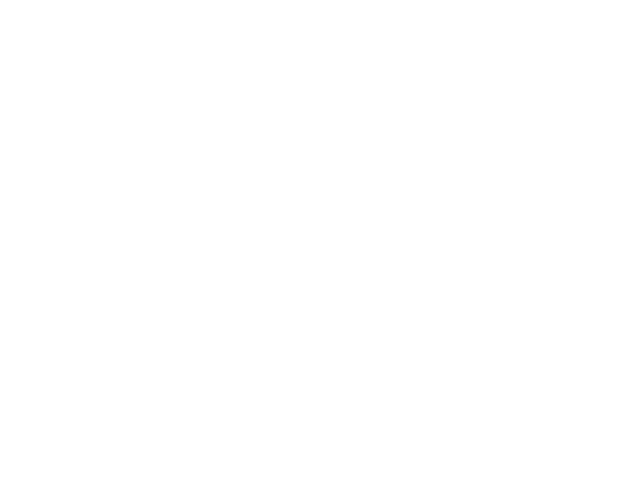

In [24]:
ymax = 70

fig1=plt.figure(1)

x_axis = np.arange(len(W))
plt.bar(x_axis -0.1,W,width=0.2,color='g',align='center',label="Win")
plt.bar(x_axis+0.1,L,width=0.2,color='r',align='center',label="Lost")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["All games","Home","Away"])

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,ymax)


# Give the chart a title, x label, and y label

plt.xlabel("Game type")
plt.ylabel("Percentage")

plt.legend(loc='best')

#title_str = "Percentage of WL -" +  full_name
plt.title(f"Percentage of WL - %s" %full_name)
plt.tight_layout()
plt.savefig(output_file)

In [25]:
plt.show()
plt.close(fig1)

## Look into the +/- data, combination of (W,L) and (Home,Away)

In [26]:
# compute average pts when away
away_WL_PT_mean = away_df.groupby("WL").mean()["PTS"]
away_WL_PT_mean

WL
L    107.500000
W    118.111111
Name: PTS, dtype: float64

In [27]:
# compute average plus_minus when away
away_WL_plus_Minus_mean = away_df.groupby("WL").mean()["PLUS_MINUS"]
away_WL_plus_Minus_mean

WL
L    -8.285714
W    11.666667
Name: PLUS_MINUS, dtype: float64

In [28]:
# compute average pts when home
home_WL_PT_mean = Home_df.groupby("WL").mean()["PTS"]
home_WL_PT_mean

WL
L    111.263158
W    117.227273
Name: PTS, dtype: float64

In [29]:
# compute average plus_minus when home
home_WL_plus_minus_mean = Home_df.groupby("WL").mean()["PLUS_MINUS"]
home_WL_plus_minus_mean

WL
L    -8.368421
W    10.863636
Name: PLUS_MINUS, dtype: float64

In [30]:
# extract Win from home 
Home_W_df = Home_df[Home_df["WL"] == "W"]
Home_W_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801226,OKC @ MIL,2019-04-10,W,127,11.0
2,21801197,OKC @ MIN,2019-04-07,W,132,6.0
9,21801083,OKC @ TOR,2019-03-22,W,116,7.0
15,21801005,OKC @ UTA,2019-03-11,W,98,9.0
17,21800976,OKC @ POR,2019-03-07,W,129,8.0


In [31]:
# extract lost from home 
Home_L_df = Home_df[Home_df["WL"] == "L"]
Home_L_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
8,21801104,OKC @ MEM,2019-03-25,L,103,-12.0
13,21801020,OKC @ IND,2019-03-14,L,106,-2.0
16,21800985,OKC @ LAC,2019-03-08,L,110,-8.0
18,21800963,OKC @ MIN,2019-03-05,L,120,-11.0
20,21800940,OKC @ SAS,2019-03-02,L,102,-14.0


In [32]:
# extract win from away
away_W_df = away_df[away_df["WL"] == "W"]
away_W_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
1,21801218,OKC vs. HOU,2019-04-09,W,112,1.0
3,21801186,OKC vs. DET,2019-04-05,W,123,13.0
4,21801161,OKC vs. LAL,2019-04-02,W,119,16.0
7,21801119,OKC vs. IND,2019-03-27,W,107,8.0
14,21801017,OKC vs. BKN,2019-03-13,W,108,12.0


In [33]:
# extract lost from away
away_L_df = away_df[away_df["WL"] == "L"]
away_L_df

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
5,21801146,OKC vs. DAL,2019-03-31,L,103,-3.0
6,21801133,OKC vs. DEN,2019-03-29,L,105,-10.0
10,21801072,OKC vs. TOR,2019-03-20,L,114,-9.0
11,21801054,OKC vs. MIA,2019-03-18,L,107,-9.0
12,21801038,OKC vs. GSW,2019-03-16,L,88,-22.0
21,21800927,OKC vs. PHI,2019-02-28,L,104,-4.0
23,21800890,OKC vs. SAC,2019-02-23,L,116,-3.0
38,21800670,OKC vs. LAL,2019-01-17,L,128,-10.0
42,21800603,OKC vs. MIN,2019-01-08,L,117,-2.0
43,21800588,OKC vs. WAS,2019-01-06,L,98,-18.0


In [34]:
away_L_PlusMinus = away_df[away_df["WL"] == "L"]["PLUS_MINUS"]
away_L_PlusMinus

5     -3.0
6    -10.0
10    -9.0
11    -9.0
12   -22.0
21    -4.0
23    -3.0
38   -10.0
42    -2.0
43   -18.0
50    -2.0
63    -7.0
78    -6.0
79   -11.0
Name: PLUS_MINUS, dtype: float64

In [35]:
away_L_Pts = away_df[away_df["WL"] == "L"]["PTS"]
away_L_Pts

5     103
6     105
10    114
11    107
12     88
21    104
23    116
38    128
42    117
43     98
50    112
63     98
78     95
79    120
Name: PTS, dtype: int64

In [36]:
Home_L_PlusMinus = Home_df[Home_df["WL"] == "L"]["PLUS_MINUS"]
Home_L_Pts = Home_df[Home_df["WL"] == "L"]["PTS"]

In [37]:
away_W_PlusMinus = away_df[away_df["WL"] == "W"]["PLUS_MINUS"]
away_W_Pts = away_df[away_df["WL"] == "W"]["PTS"]

In [38]:
Home_W_PlusMinus = Home_df[Home_df["WL"] == "W"]["PLUS_MINUS"]
Home_W_Pts = Home_df[Home_df["WL"] == "W"]["PTS"]

<IPython.core.display.Javascript object>


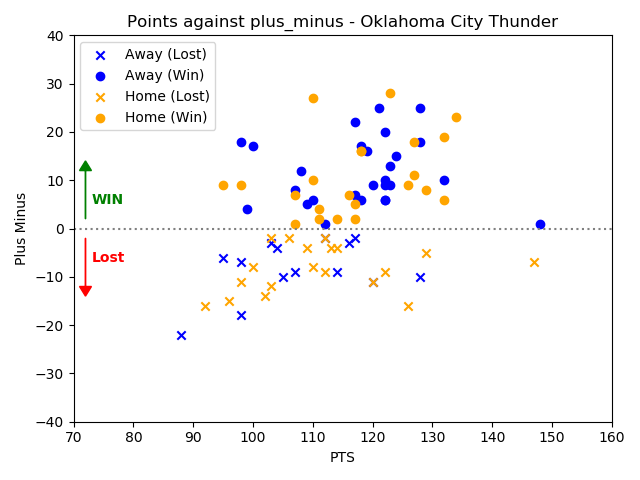

In [45]:
x_min = 70
x_max = 160
y_min = -40
y_max = 40

fig2=plt.figure(2)
plt.scatter(away_L_Pts,away_L_PlusMinus,color='blue',marker='x',label='Away (Lost)')
plt.scatter(away_W_Pts,away_W_PlusMinus,color='blue',marker='o',label='Away (Win)')
plt.scatter(Home_L_Pts,Home_L_PlusMinus,color='orange',marker='x',label='Home (Lost)')
plt.scatter(Home_W_Pts,Home_W_PlusMinus,color='orange',marker='o',label='Home (Win)')

plt.plot([x_min,x_max],[0,0],color='grey',linestyle=':')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.legend(loc='upper left')
plt.xlabel("PTS")
plt.ylabel("Plus Minus")
plt.title(f"Points against plus_minus - %s" %full_name)

plt.text(x_min+3, 5,"WIN",color='green',weight='bold')
plt.arrow(x_min+2,  2,0,10, head_width=2, head_length=2, fc='green', ec='green')

plt.text(x_min+3, -7,"Lost",color='red',weight='bold')
plt.arrow(x_min+2, -2,0,-10, head_width=2, head_length=2, fc='red', ec='red')

#plt.text(x_min+5, -4,"LOST")
plt.tight_layout()


plt.savefig(output_file2)



In [46]:
plt.show()
plt.close(fig2)